In [6]:
print ("Hello world")

Hello world


In [2]:
import pandas as pd

## I need to load my data now, first I will import my library

health_data = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\DATASET FOR TRAINING\\Health Dataset Python\\Health_dataset.csv")
## initially, i used a single back slash and it gave error, so I had to use double back slash which worked.


# Display the first few rows
print(health_data.head())

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  
3     2022-02-07     2022-02-11        Recovered            NaN    1943-01-17  
4     2022-10-25     2022-10-30        Recovered            NaN    1979-07-28  


In [3]:
## I can as well use the single back slahs with by adding r before the "C:\"
health_data2 = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DATASET FOR TRAINING\Health Dataset Python\Health_dataset.csv")

# Display the first few rows
print(health_data2.head(15))

   Patient ID  Gender         Disease         Treatment  \
0   PAT-00001    Male    Tuberculosis          Dialysis   
1   PAT-00002  Female         Malaria          Dialysis   
2   PAT-00003  Female         Malaria           Surgery   
3   PAT-00004    Male          Asthma          Dialysis   
4   PAT-00005  Female        Diabetes  Physical Therapy   
5   PAT-00006    Male   Heart Disease          Dialysis   
6   PAT-00007  Female    Tuberculosis          Dialysis   
7   PAT-00008  Female   Heart Disease          Dialysis   
8   PAT-00009  Female          Cancer          Dialysis   
9   PAT-00010  Female         Malaria          Dialysis   
10  PAT-00011    Male          Asthma           Surgery   
11  PAT-00012    Male  Kidney Failure      Chemotherapy   
12  PAT-00013    Male        HIV/AIDS  Physical Therapy   
13  PAT-00014    Male   Heart Disease          Dialysis   
14  PAT-00015    Male          Cancer  Physical Therapy   

                 Hospital Admission Date Discharge Date

In [33]:
## Assuming I want to display only selected columns, i will have to use the usecols function
health_data3 = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DATASET FOR TRAINING\Health Dataset Python\Health_dataset.csv",
                           usecols= ['Gender', 'Treatment']
                           )


# Display the first few rows
print(health_data3.head(15))

    Gender         Treatment
0     Male          Dialysis
1   Female          Dialysis
2   Female           Surgery
3     Male          Dialysis
4   Female  Physical Therapy
5     Male          Dialysis
6   Female          Dialysis
7   Female          Dialysis
8   Female          Dialysis
9   Female          Dialysis
10    Male           Surgery
11    Male      Chemotherapy
12    Male  Physical Therapy
13    Male          Dialysis
14    Male  Physical Therapy


In [5]:
### What is the total number of patients, let's count the number of patients
sum_records = health_data.shape[0]

print("Total patients is ", sum_records)

Total patients is  8000


In [6]:
#### How is the patients population distributed by gender

gender_count =health_data['Gender'].value_counts()

print("Gender Distribution")
print(gender_count)

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64


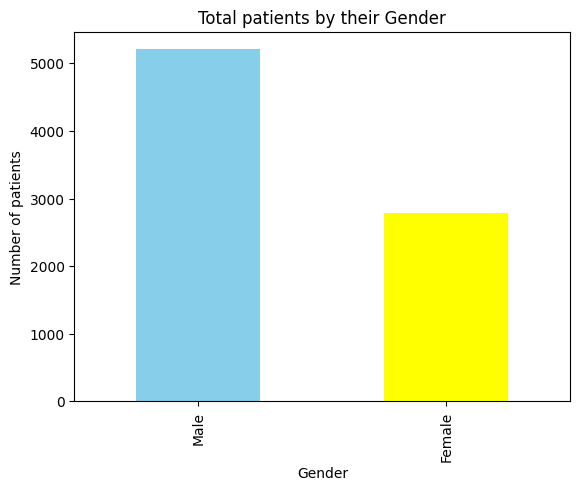

In [7]:
### To visualise the gender distrution
## we need to import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##%matplotlib inline


gender_count.plot(kind='bar', color= ['skyblue', 'yellow'])
plt.title("Total patients by their Gender")
plt.ylabel("Number of patients")
plt.show()

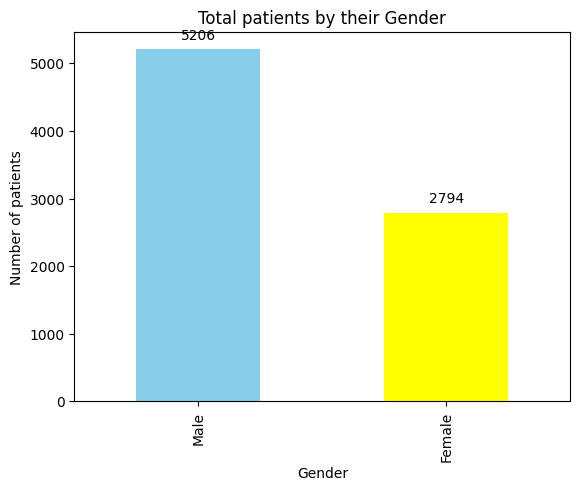

In [8]:
### Adding data label

ax = gender_count.plot(kind='bar', color= ['skyblue', 'yellow'])
plt.title("Total patients by their Gender")
plt.ylabel("Number of patients")


## Label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,5),
        textcoords = "offset points",
        ha = 'center',
        va = 'bottom'
    )
plt.show()  


Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


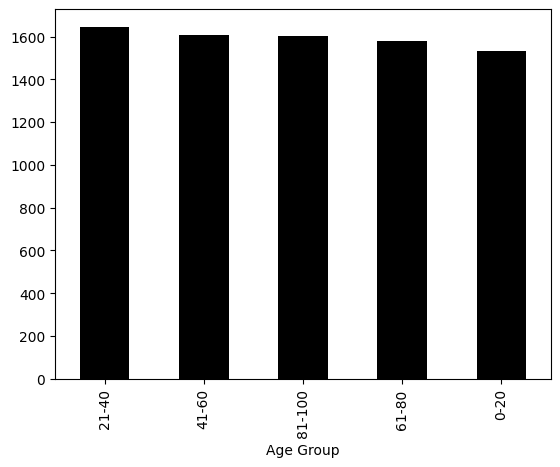

In [16]:
## To calculate patient's age -group by total visit

### I need to convert the admission date and date of birth to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

## calculate the patients age as of the time of admission in year
health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days / 365.25
## we are trying to convert the data type to an interger

health_data['Age'] = health_data['Age'].astype(int)
## print(health_data['Age'])


### Define age bins
bins = [0,20,40,60,80,100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

### We are addung a new column caled the age group according to the bin

health_data['Age Group'] = pd.cut(health_data['Age'], bins = bins, labels = labels, right = False)

###print(health_data['Age Group'])

age_count = health_data['Age Group'].value_counts()
print(age_count)


### We can visualise  the age group
ax = age_count.plot(kind='bar', color= 'black')

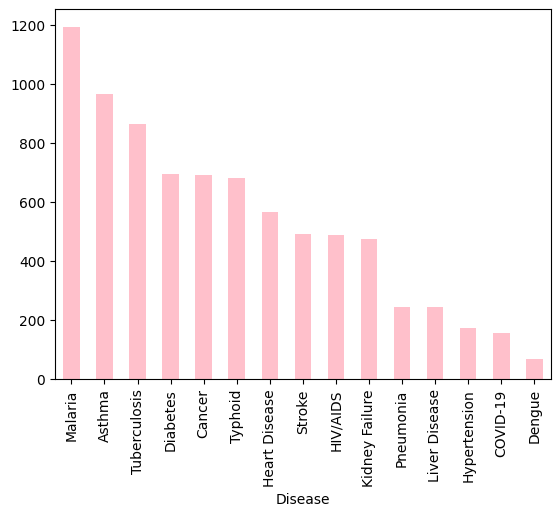

In [18]:
### Which disease are most commonly diagnosed among the patients
disease_counts = health_data['Disease'].value_counts()
ax = disease_counts.plot(kind='bar', color='pink')
plt.show()

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Diabetes         694
Cancer           691
Name: count, dtype: int64


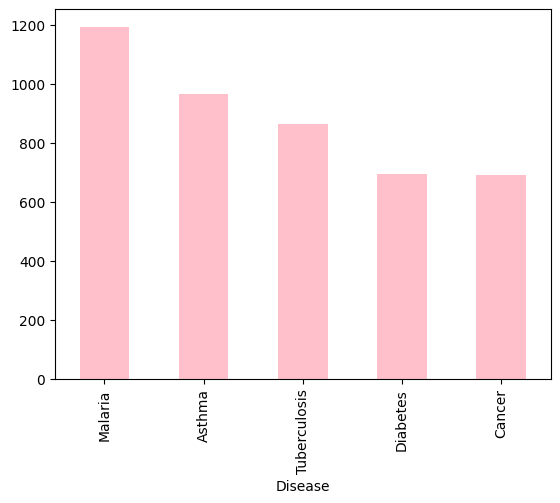

In [28]:
### But we are interesting in the most common diagnosed, say the top 5
top_disease_counts = health_data['Disease'].value_counts().nlargest(5)  ##get the top 5 diseases
ax = top_disease_counts.plot(kind='bar', color='pink')
print(top_disease_counts)
plt.show()


In [25]:
### But we are interesting in the most common diagnosed and adding the ","
top_disease_counts = health_data['Disease'].value_counts().nlargest(5)
total_top5 = top_disease_counts.sum()
format_value ="{:,}".format(total_top5)
print("Total count of the 5 most common disease:", format_value)



Total count of the 5 most common disease: 4,408


In [29]:
### we want to use a dynamic variable

dynamictop = 2
top_disease_counts = health_data['Disease'].value_counts().nlargest(dynamictop)  # I can use the dynamictop variable inside the nlargest
total_top = top_disease_counts.sum()
format_value ="{:,}".format(total_top)
description =f"Total count of the {dynamictop} most common diseases:"
print(description, format_value)

Total count of the 2 most common diseases: 2,159


Disease
Dengue            69
COVID-19         157
Hypertension     173
Liver Disease    244
Pneumonia        246
Name: count, dtype: int64


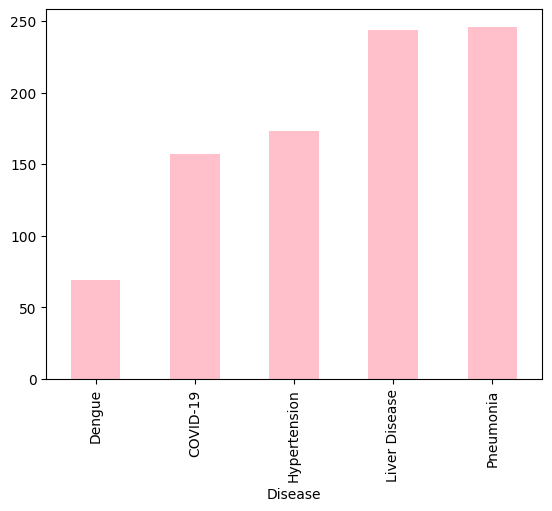

In [32]:
### But we are interesting in the least common diagnosed, say the top 5
least_disease_counts = health_data['Disease'].value_counts().nsmallest(5)  ##get the top 5 diseases
ax = least_disease_counts.plot(kind='bar', color='pink')
print(least_disease_counts)
plt.show()


In [37]:
# we want to find the percentage of the top 3 common diseases
disease_counts3 = health_data['Disease'].value_counts().nlargest(3) # get the three top diseases
total_disease_count = health_data['Disease'].value_counts().sum()

# Now we go for the percentage

percentage = (disease_counts3/total_disease_count) * 100
print(percentage)

Disease
Malaria         14.9125
Asthma          12.0750
Tuberculosis    10.8000
Name: count, dtype: float64


In [39]:
### To round it off to whole number

roundpercentage = percentage.round().astype(int)
print(roundpercentage)

Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int64


In [42]:
### To round it off to whole number

roundpercentage = percentage.round().astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")


Malaria: 15%
Asthma: 12%
Tuberculosis: 11%
